# Import & Setting

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
from scipy import stats
from matplotlib import style
style.use('ggplot')
import datetime


In [2]:
# 노트북에 plot 그리기
%matplotlib inline    
# plot의 글씨 선명하게
%config InlineBackend.figure_format = 'retina'  

plt. style.use('ggplot')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) # Mac의 경우는 AppleGothic, 윈도우의 경우는 Malgun Gothic을 사용하면 됩니다 :) 
mpl.rc('axes', unicode_minus=False)

In [3]:
pd.set_option('display.max_columns', 40)

In [4]:
pd.set_option('display.max_rows', 500)

# 사용자 지정 함수

In [5]:
# , 제거
def delcom(x):
    result = x.replace(',','')
    return result

# DATA_load

In [6]:
product=pd.read_csv('01_Pruduct.csv')  # 오류는 밑에서 전처리 할것임
search1=pd.read_csv('02_Search1.csv')
search2=pd.read_csv('03_Search2.csv',parse_dates=["SESS_DT"])
custom=pd.read_csv('04_Custom.csv')
session=pd.read_csv('05_Session.csv',parse_dates=["SESS_DT"])
master=pd.read_csv('06_Master.csv')

C:\Users\meuch\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 전처리

- product

In [7]:
# CT가 형태가 혼합이 되어있다. STR로 변환 후 컴마 제거 후 INT로 변경
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('str')
product['PD_BUY_AM']=product['PD_BUY_AM'].apply(delcom)
product['PD_BUY_CT']=product['PD_BUY_CT'].apply(delcom)
product['PD_BUY_AM']=product['PD_BUY_AM'].astype('int')
product['PD_BUY_CT']=product['PD_BUY_CT'].astype('int')


#총판매량 추가
product['PD_BUY_TOTAL']=product['PD_BUY_AM']*product['PD_BUY_CT']

#[] 제거
product['PD_BRA_NM']=product['PD_BRA_NM'].apply(lambda x : x.translate({ord('['):'',
                                                   ord(']'):''}))
print(sum(product['PD_BRA_NM']=='아베다'))

7004


- search2

In [8]:
search2['year']=search2['SESS_DT'].dt.year
search2['month']=search2['SESS_DT'].dt.month
search2['day']=search2['SESS_DT'].dt.day

- session

In [9]:
session['year']=session['SESS_DT'].dt.year
session['month']=session['SESS_DT'].dt.month
session['day']=session['SESS_DT'].dt.day

In [10]:
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].astype('str')
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].apply(delcom)
session['TOT_SESS_HR_V']=session['TOT_SESS_HR_V'].astype('float')

# 병합

In [11]:
# product + session
prod_sess=pd.merge(product,session,on=['CLNT_ID','SESS_ID'])

In [12]:
# product + session + master
psm=pd.merge(prod_sess,master,on='PD_C')
del prod_sess  # 메모리절약

In [13]:
# product + session + master + custom
pscm=pd.merge(psm,custom,on='CLNT_ID',how='left')
del psm   # 메모리절약

# 변수선택

In [14]:
pscm=pscm.drop(['CLAC2_NM','CLAC3_NM'],axis=1)

In [15]:
# 시간에 따라 변화하는그래프를 그리기 위해서 COUNT_DAY를 추가해준다.
pscm['COUNT_DAY']=pscm['SESS_DT'].apply(lambda x: x.toordinal())

# 결측치

In [ ]:
# 결측치를 세부적으로 살펴 보면 2-3의 경우가 결측치의 대부분이다.
# 2-3의 경우 TOT_PAG_VIEW_CT가 1인 경우가 16247/16325 *100 = 99.52%  이므로 1로 대체한다.

# pscm[(~pscm['TOT_PAG_VIEW_CT'].isnull()) & (pscm['TOT_SESS_HR_V'].isnull())]['TOT_PAG_VIEW_CT']==1

In [16]:
pscm.columns

Index(['CLNT_ID', 'SESS_ID', 'HITS_SEQ', 'PD_C', 'PD_ADD_NM', 'PD_BRA_NM',
       'PD_BUY_AM', 'PD_BUY_CT', 'PD_BUY_TOTAL', 'SESS_SEQ', 'SESS_DT',
       'TOT_PAG_VIEW_CT', 'TOT_SESS_HR_V', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM',
       'year', 'month', 'day', 'PD_NM', 'CLAC1_NM', 'CLNT_GENDER', 'CLNT_AGE'],
      dtype='object')

# 분석

# 1. 제품 인기도

In [ ]:
요일별 인기도

# 2. 제품 탐색 및 구매 시각

In [16]:
day_count=pscm.groupby(['CLAC1_NM','COUNT_DAY'])['CLNT_ID'].agg({'count':len}).reset_index()

C:\Users\meuch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  """Entry point for launching an IPython kernel.


In [61]:
day_count.head(17)

,CLAC1_NM,COUNT_DAY,count
0,가구,736785,506
1,가구,736786,435
2,가구,736787,386
3,가구,736788,350
4,가구,736789,289
5,가구,736790,313
6,가구,736791,263
7,가구,736792,355
8,가구,736793,460
9,가구,736794,348


In [40]:
# 해당 자료 기간 y년m월1일을 생성하고 days로 환산해준다. (아래 파란선을 그리기 위함)
yearmonth_list=pd.date_range(min(pscm['SESS_DT']),max(pscm['SESS_DT']), freq='MS').tolist()

In [62]:
count_day1=[i.toordinal() for i in yearmonth_list]
count_day1

[736785, 736815, 736846, 736876, 736907, 736938]

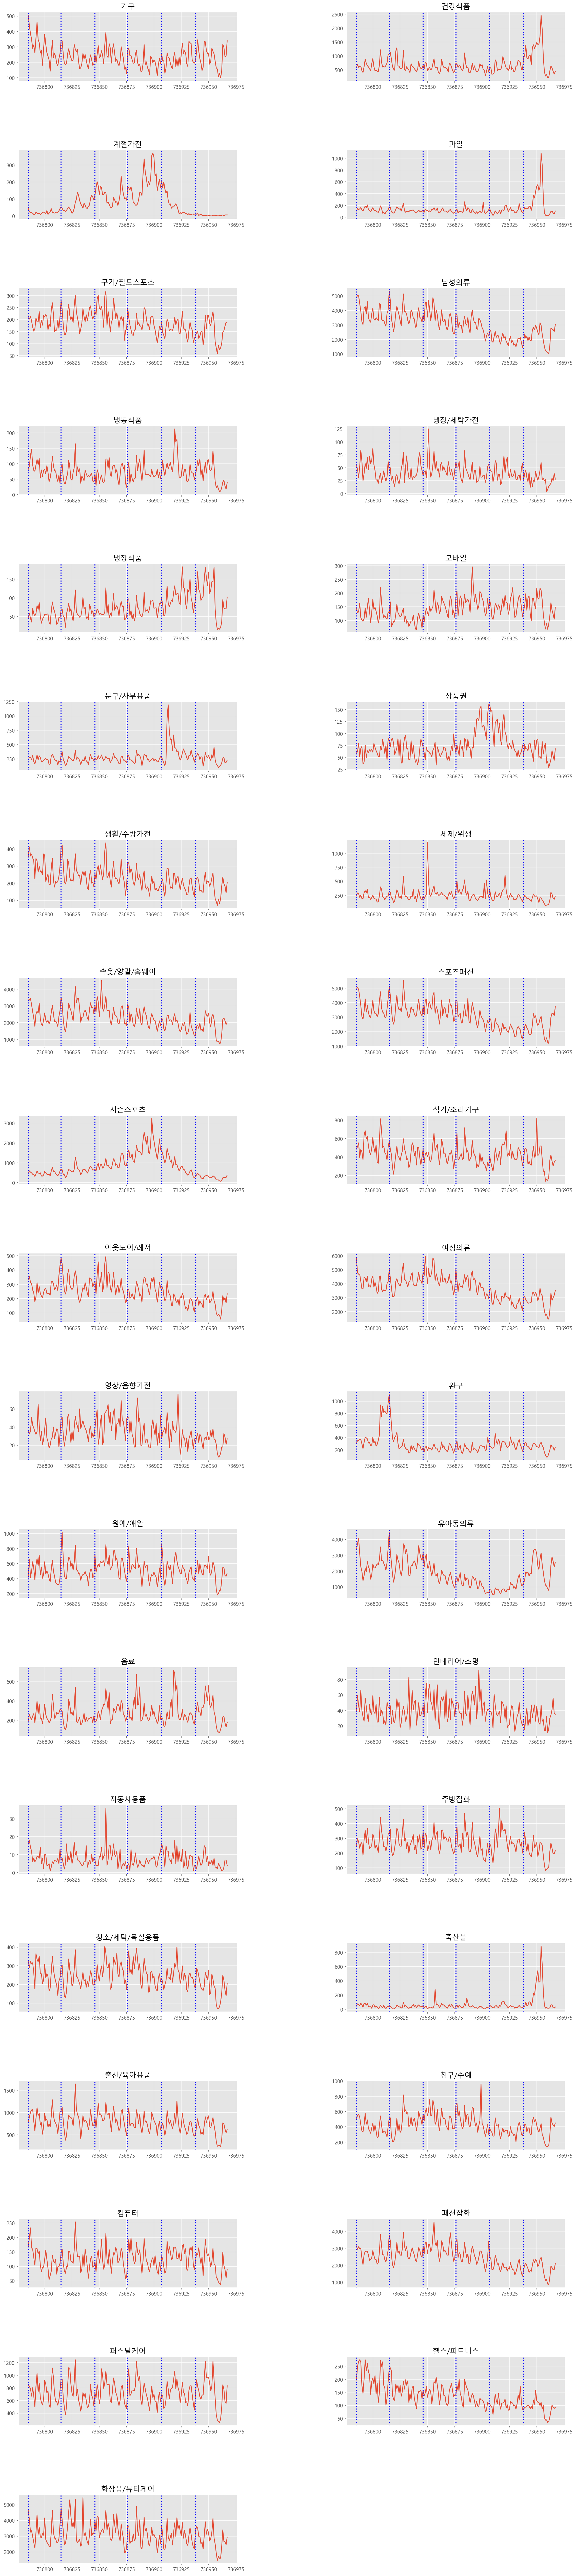

In [59]:
plt.figure(figsize=(15,70))
plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 1, wspace = 0.5)
cols = 2
rows = 19 

for i in range(1,38):
    
    data=day_count[day_count['CLAC1_NM']==day_count['CLAC1_NM'].unique()[i-1]]
    
    plt.subplot(rows, cols, i)
    
    plt.plot(data['COUNT_DAY'],data['count'])
    
    plt.title(day_count['CLAC1_NM'].unique()[i-1])
    for j in count_day1:
        plt.axvline(x=j, color='b', linestyle=':', linewidth=2)
    
    
plt.show()
    

# 3. VIP 선별

## 3-1. 이용 횟수별

In [63]:
g=pscm.groupby(['CLAC1_NM','CLNT_GENDER'])['CLNT_ID'].value_counts()
result = pd.DataFrame(g.groupby(level=[0,1]).nlargest(5))
result=pd.DataFrame({'CLAC1_NM':list(list(zip(*result.index))[0]),
              'CLNT_GENDER':list(list(zip(*result.index))[1]),
              'CLNT_ID':list(list(zip(*result.index))[4]),
              'COUNT':list(list(zip(*result.values))[0])
             })
result.head(17)

,CLAC1_NM,CLNT_GENDER,CLNT_ID,COUNT
0,가구,F,5448721,57
1,가구,F,3413272,24
2,가구,F,5205560,24
3,가구,F,1333834,21
4,가구,F,4885627,19
5,가구,M,3137116,116
6,가구,M,5909621,24
7,가구,M,244731,16
8,가구,M,3276633,14
9,가구,M,4796733,13


Text(0.5, 1.0, '카테고리별 구매횟수 top5')

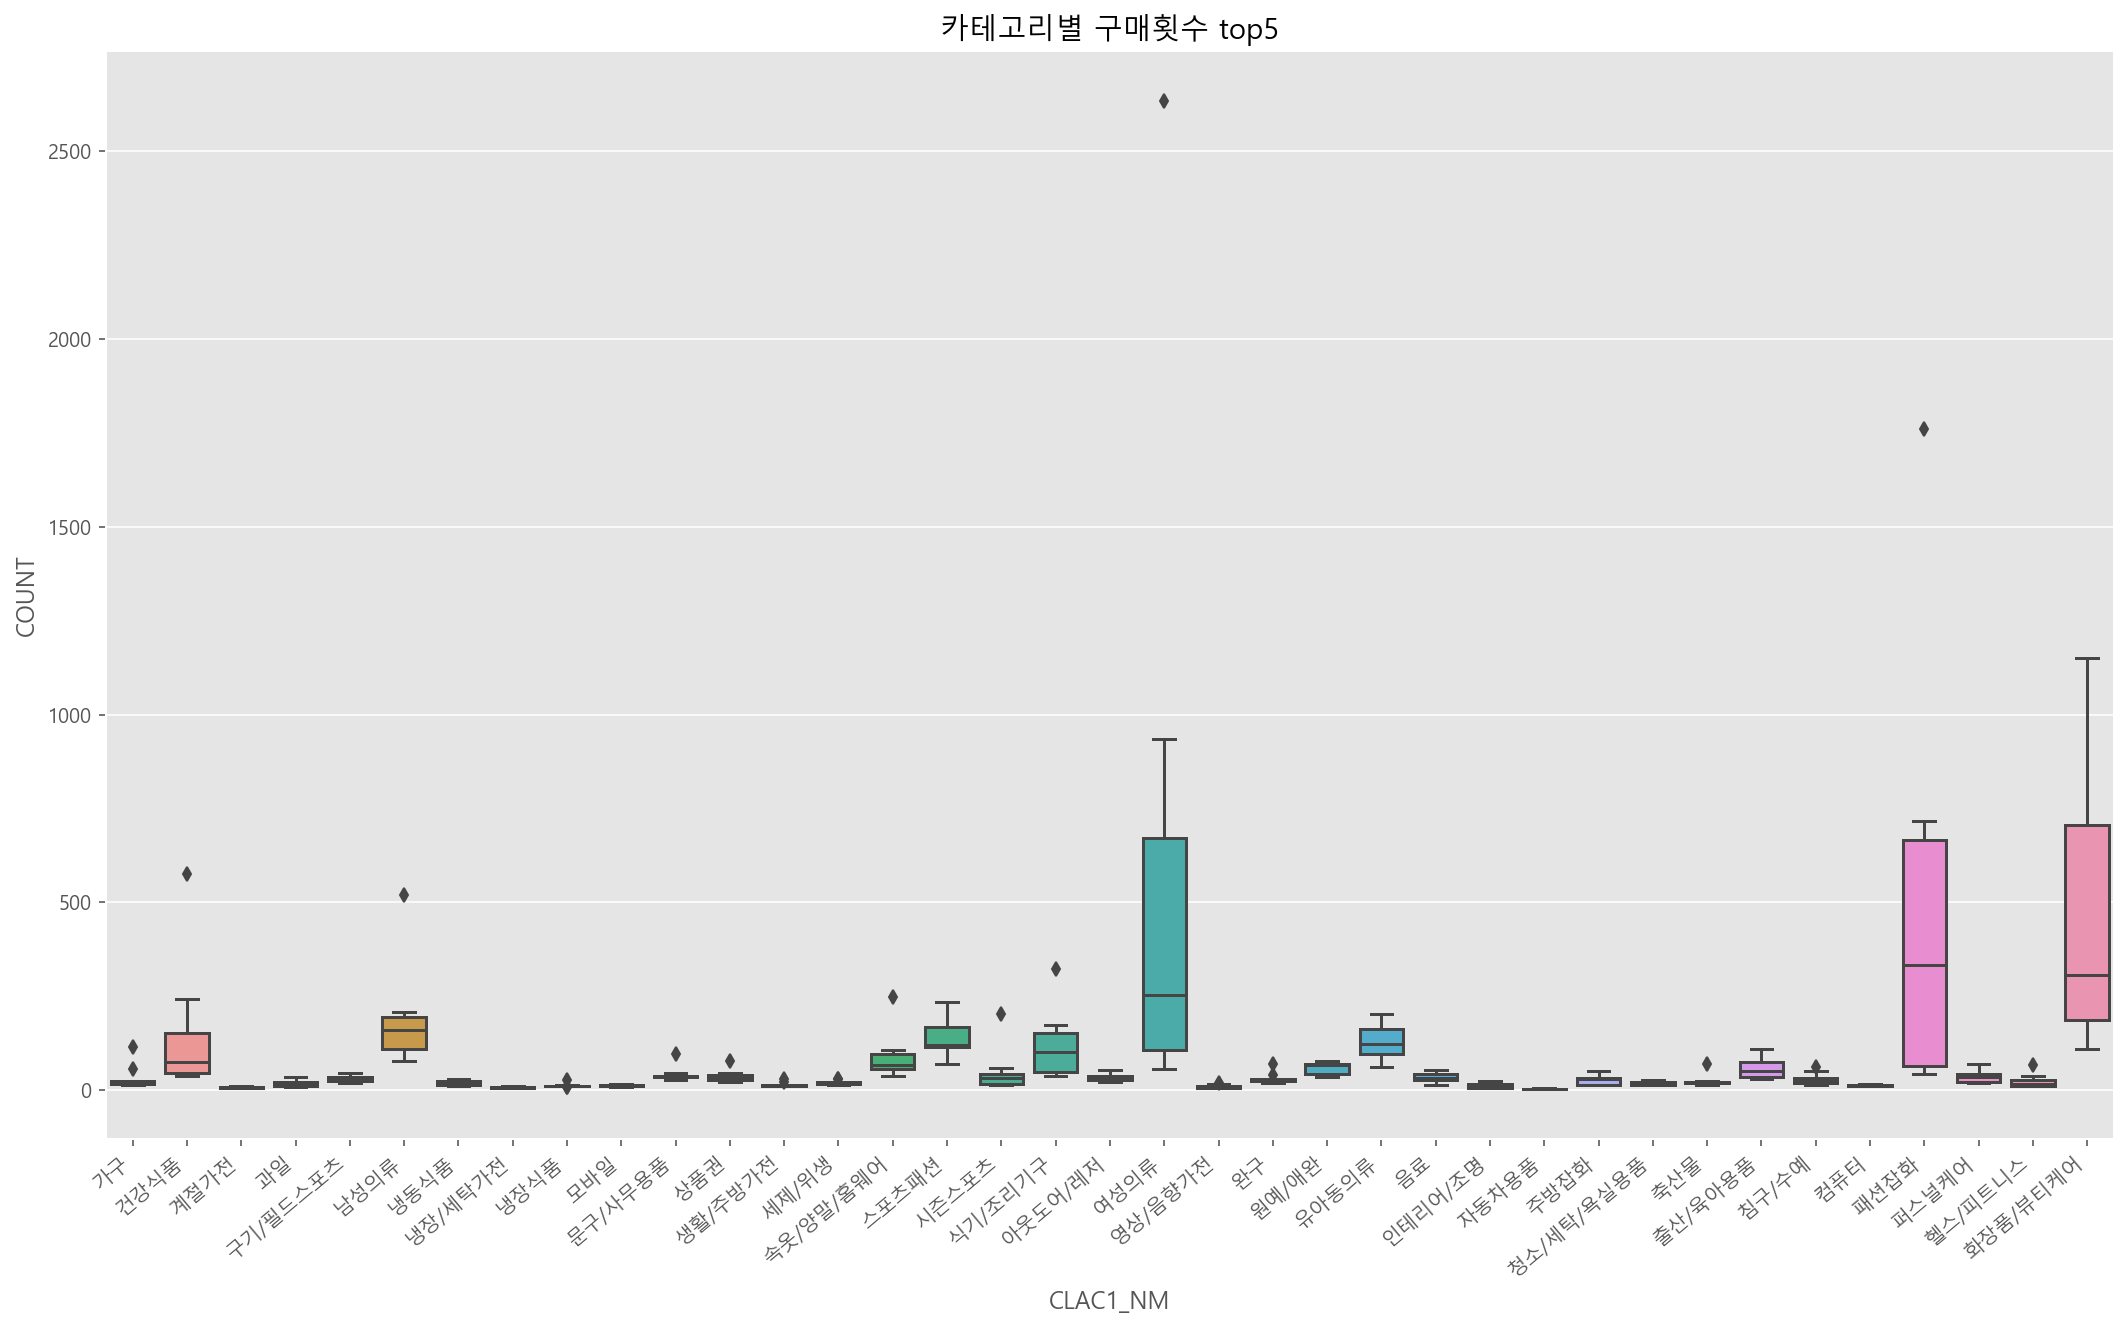

In [64]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=40,ha='right')
sns.boxplot(data=result,x='CLAC1_NM',y='COUNT')
plt.title("카테고리별 구매횟수 top5")

Text(0.5, 1.0, '남/여 카테고리별 구매횟수 top5')

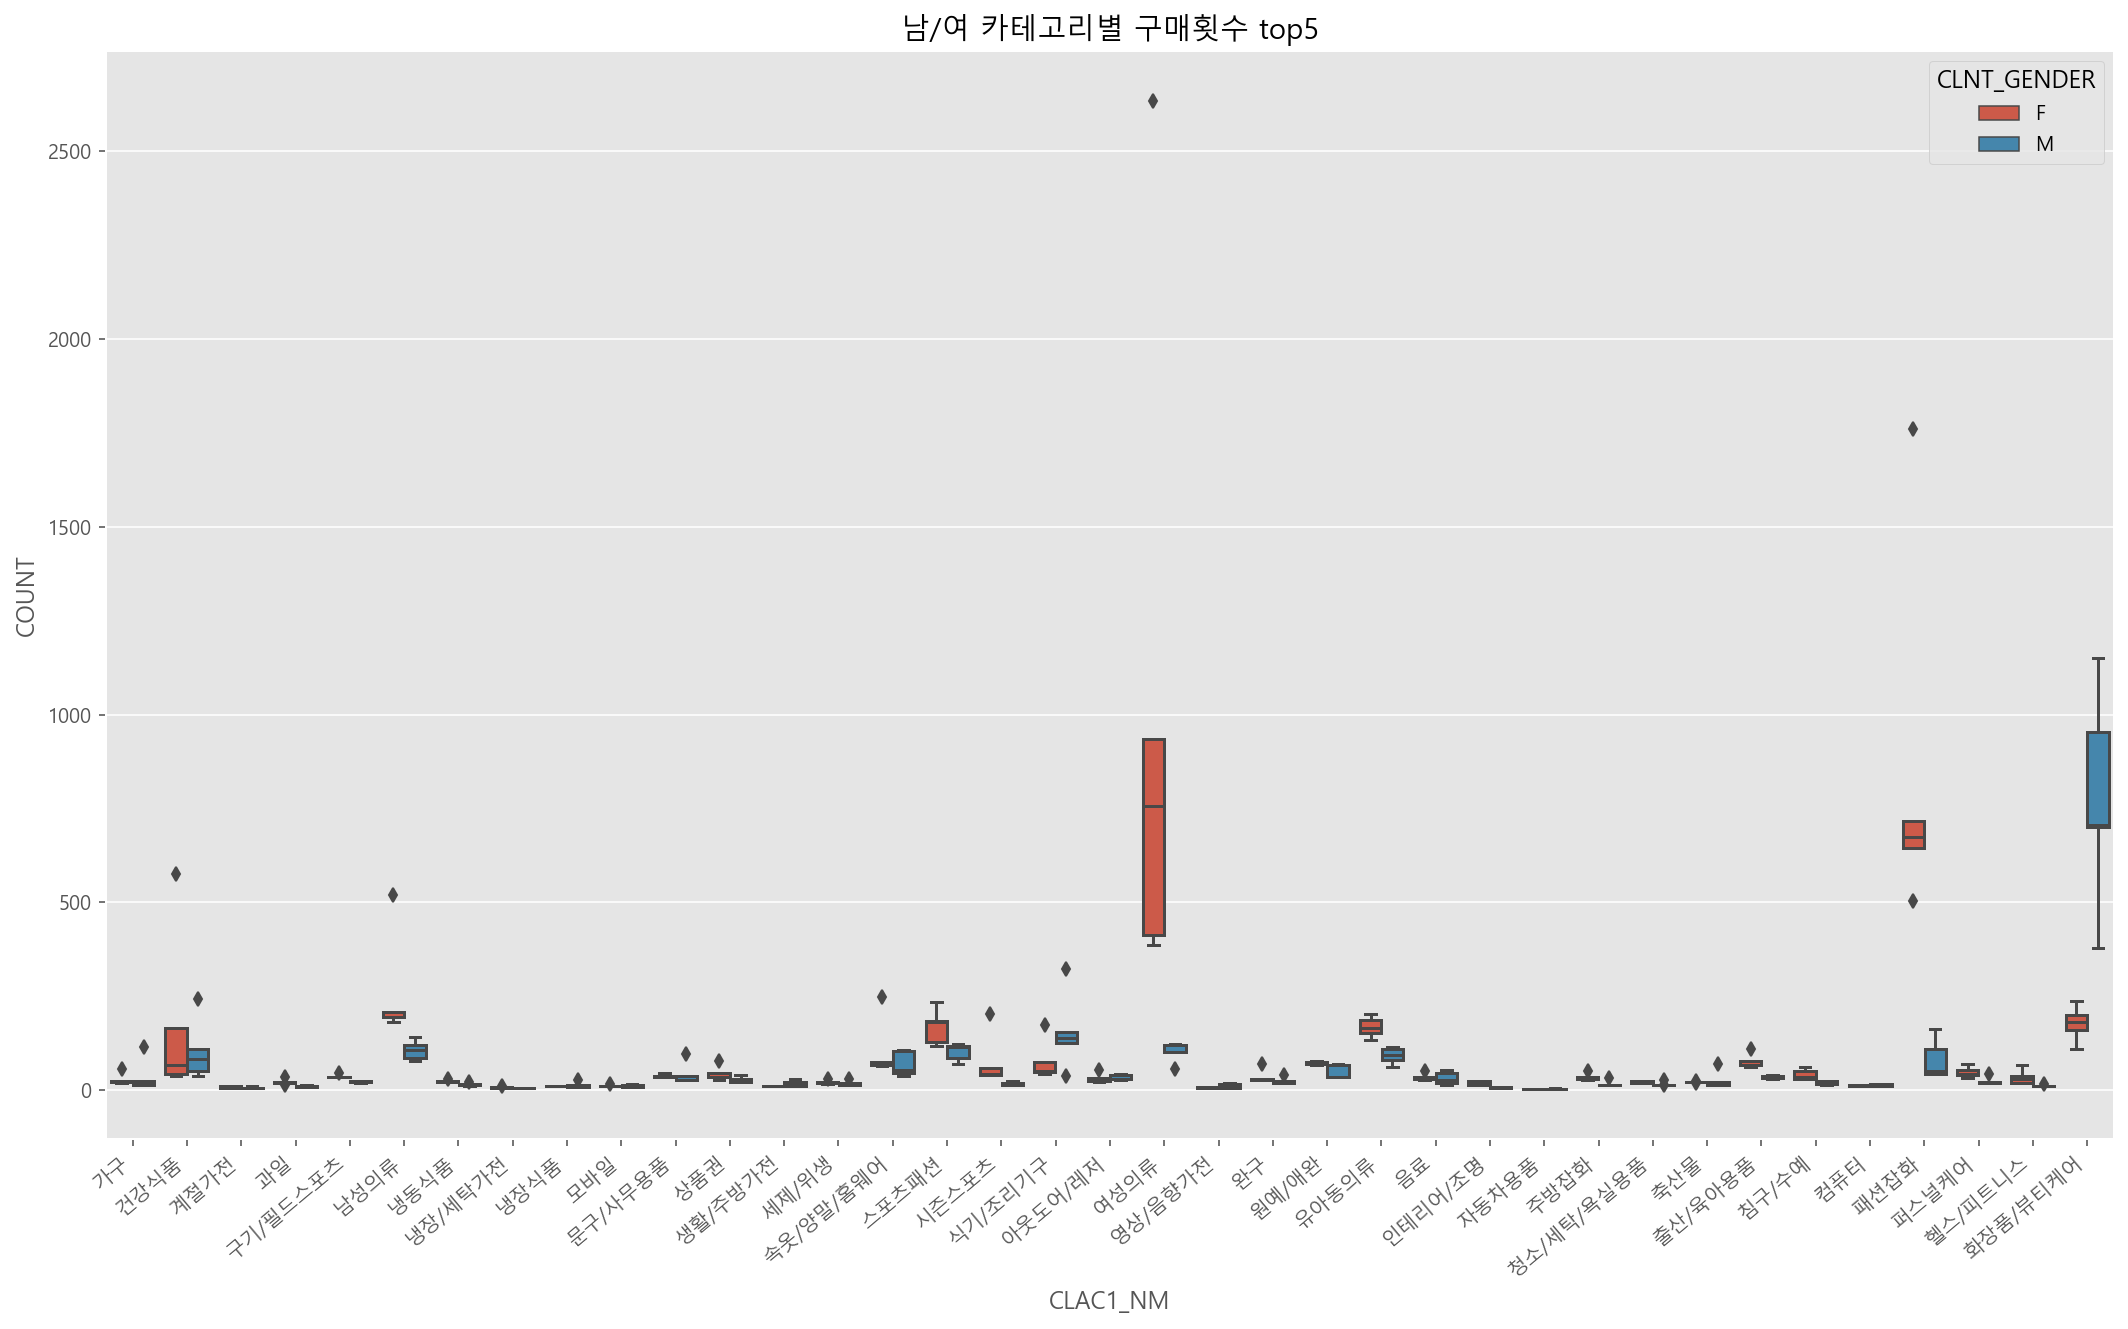

In [65]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=40,ha='right')
sns.boxplot(data=result,x='CLAC1_NM',y='COUNT',hue='CLNT_GENDER')
plt.title("남/여 카테고리별 구매횟수 top5")

## 3-2. 구매 금액별

In [66]:
pd.options.display.float_format = '{:.0f}'.format
g=pscm.groupby(['CLAC1_NM','CLNT_GENDER','CLNT_ID'])['PD_BUY_TOTAL'].sum()
result = g.groupby(level=[0,1]).nlargest(5)
result=pd.DataFrame({'CLAC1_NM':list(list(zip(*result.index))[0]),
              'CLNT_GENDER':list(list(zip(*result.index))[1]),
              'CLNT_ID':list(list(zip(*result.index))[4]),
              'SUM_BUY':result.values
             })
result.head(17)

,CLAC1_NM,CLNT_GENDER,CLNT_ID,SUM_BUY
0,가구,F,5448721,31575600
1,가구,F,4885627,30617480
2,가구,F,851538,23195000
3,가구,F,5763842,14139500
4,가구,F,5839927,13260000
5,가구,M,3137116,127327340
6,가구,M,5909621,28917530
7,가구,M,2380005,26035000
8,가구,M,3541522,15770000
9,가구,M,5780703,15455000


Text(0.5, 1.0, '카테고리별 구매 금액 top5')

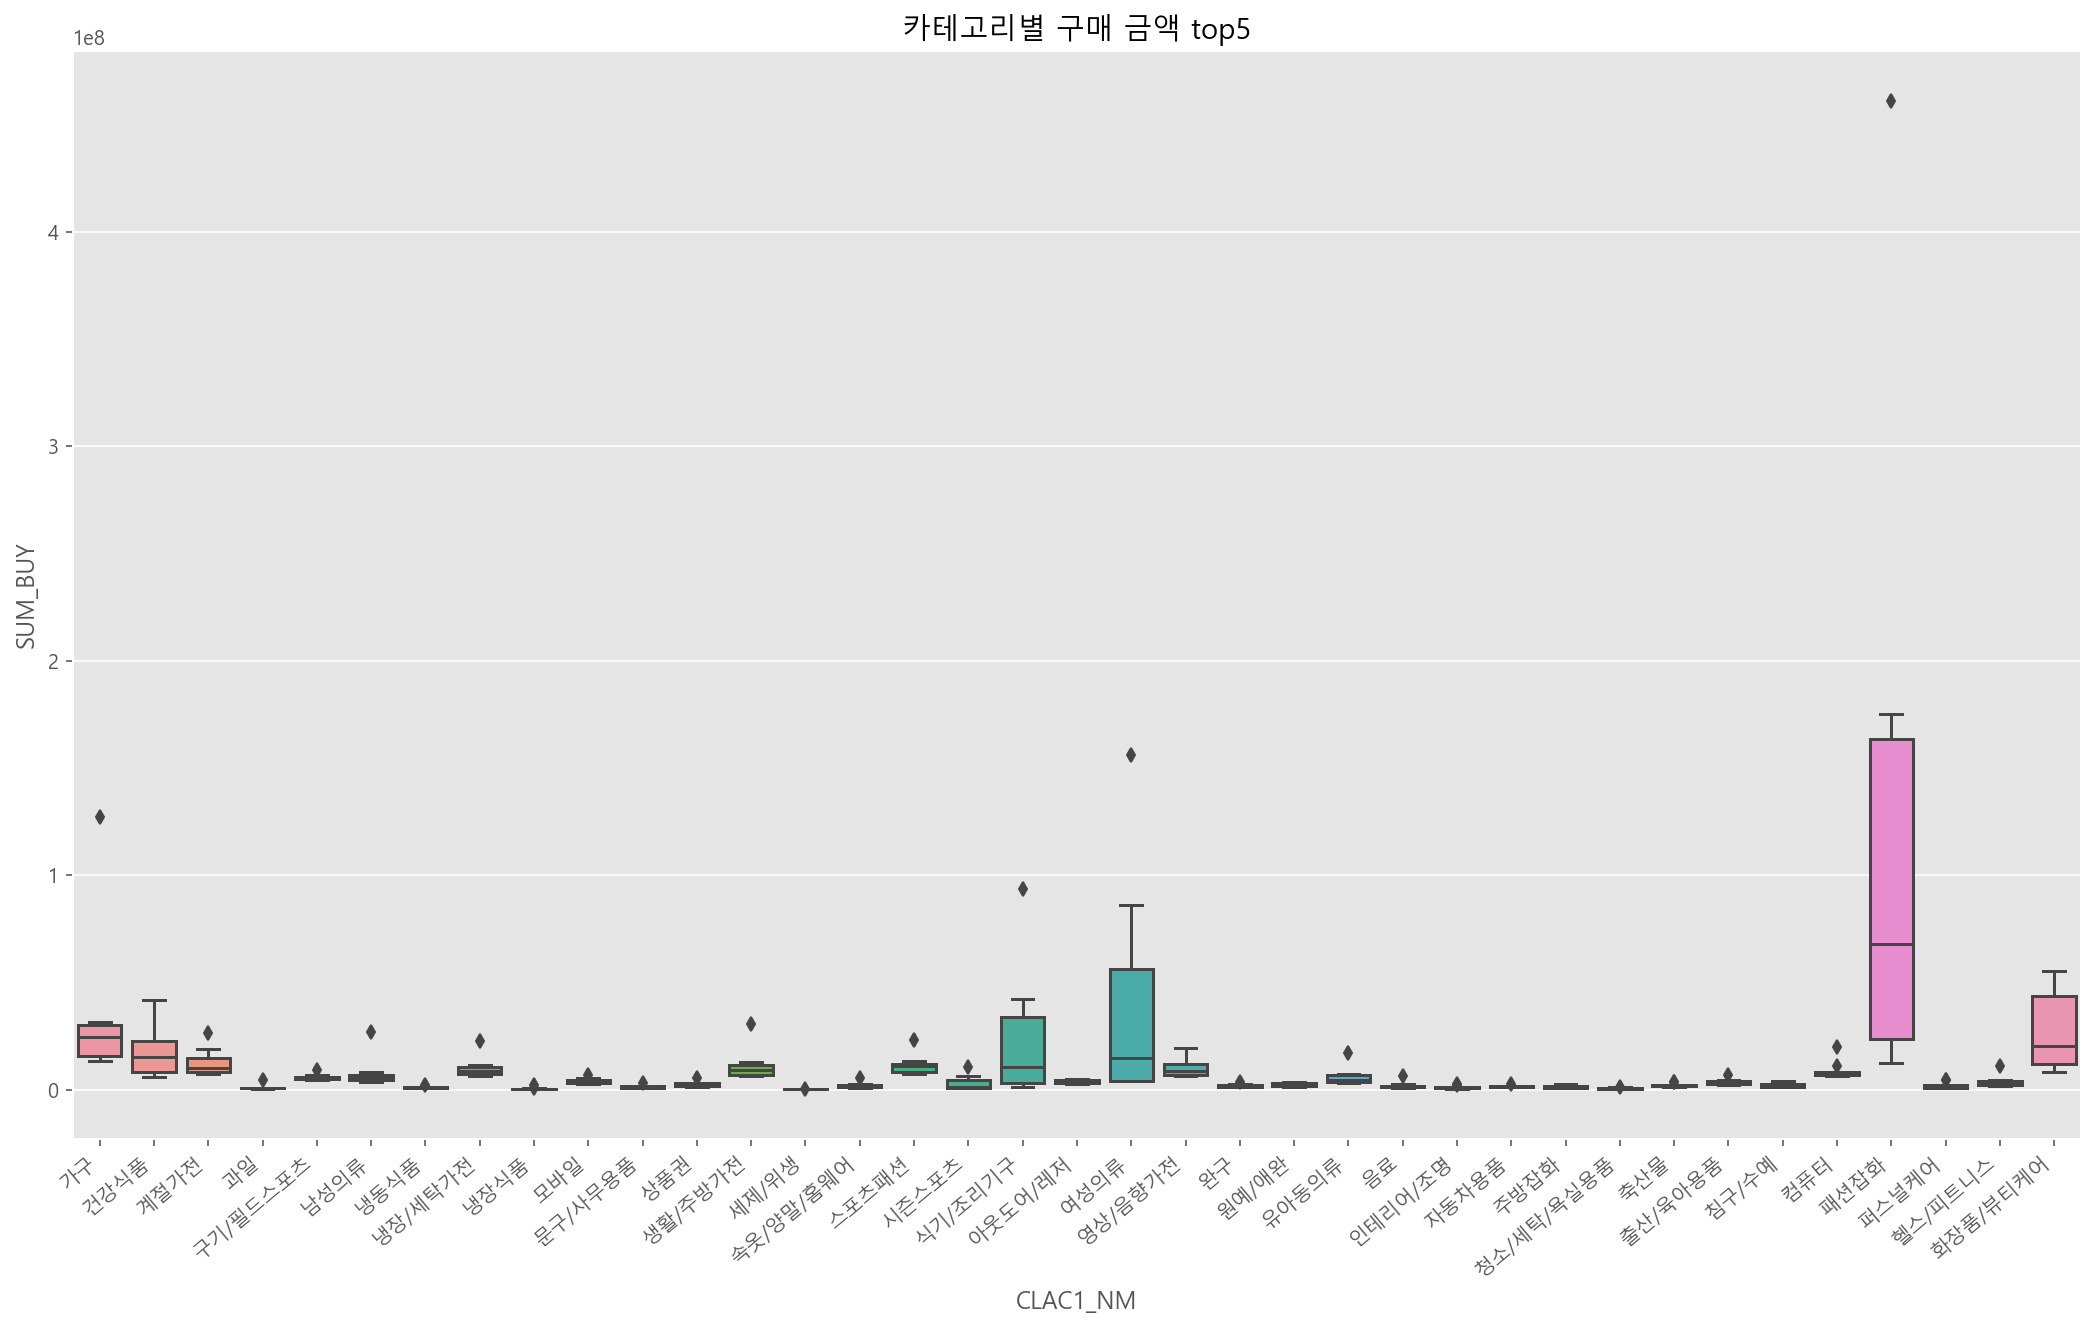

In [67]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=40,ha='right')
sns.boxplot(data=result,x='CLAC1_NM',y='SUM_BUY')
plt.title("카테고리별 구매 금액 top5")

Text(0.5, 1.0, '카테고리별 구매 금액 top5')

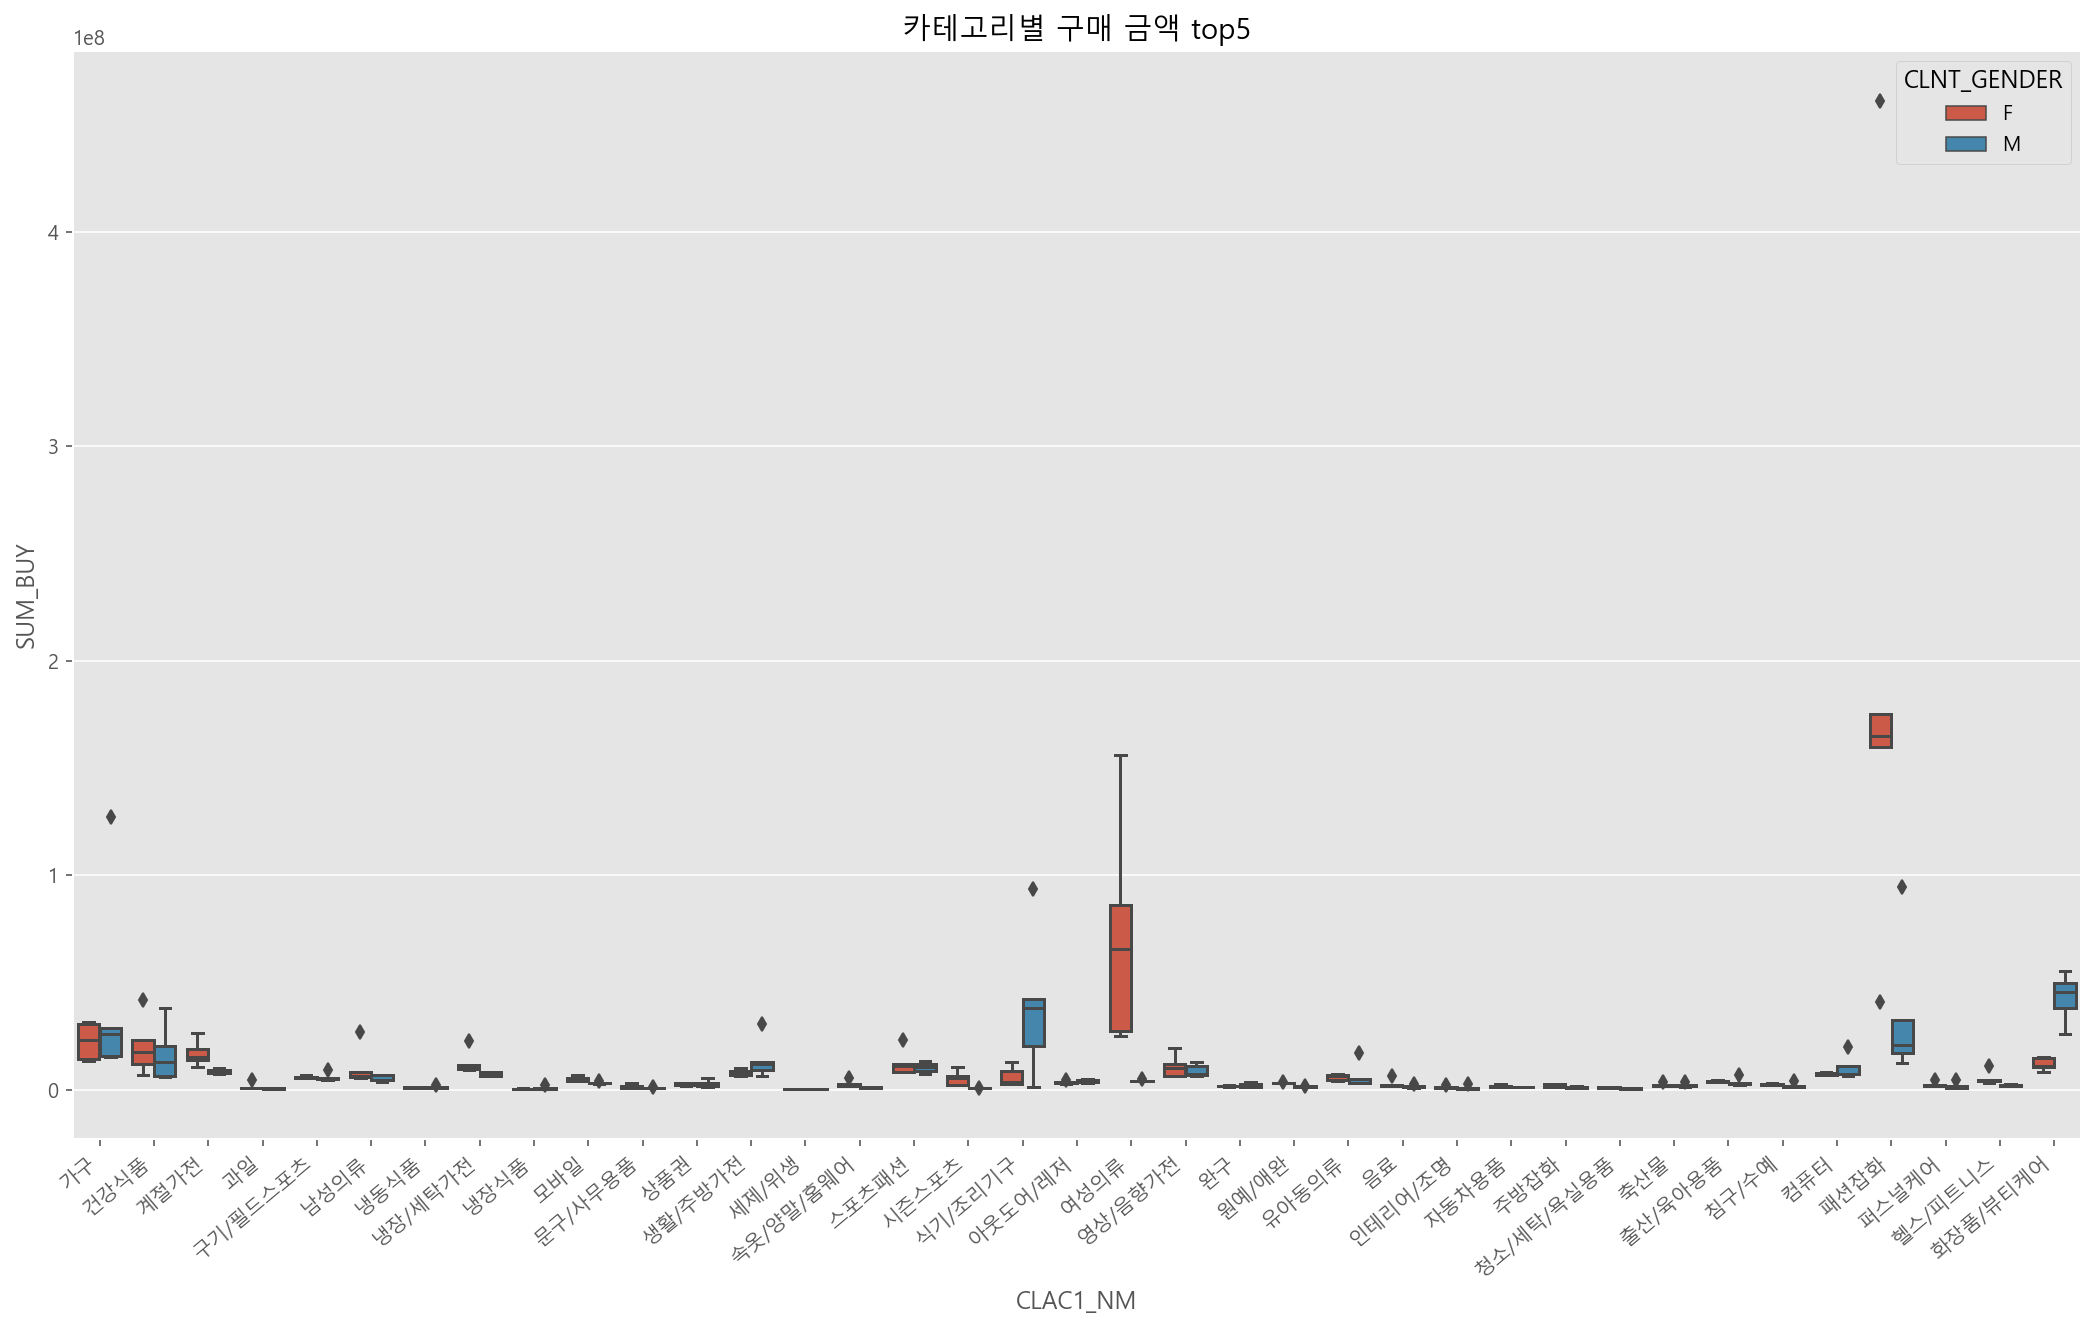

In [68]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=40,ha='right')
sns.boxplot(data=result,x='CLAC1_NM',y='SUM_BUY',hue='CLNT_GENDER')
plt.title("카테고리별 구매 금액 top5")

In [69]:
del g
del result

# 4. 제품정보 확인 및 행동 패턴